### Libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

### Importing the data

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')


In [3]:
df_test.shape

(1459, 80)

# Response variable - SalePrice
- Rigth / positive skewness
- The response variable is NOT normal distributed, which means that we're violating our assumption in respect no normality

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Axes(0.125,0.125;0.775x0.755)


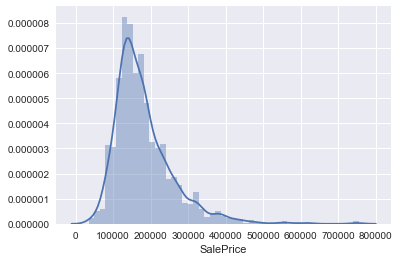

In [4]:
print(df_train['SalePrice'].describe())
#Histogram
import seaborn as sns
print(sns.distplot(df_train['SalePrice']))

#### Checking how much SalePrice deviate from a normal distribution
- Since it's very likely that I'm going to perform regressions (linear models), my depedent variables need to be "somewhat" normal distributed

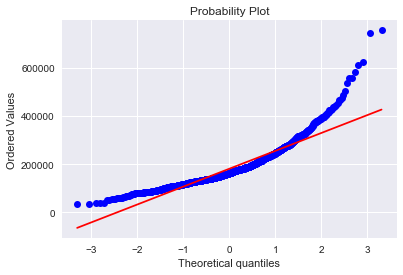

In [5]:
nf = stats.probplot(df_train['SalePrice'], plot=plt)

### Transform Response Variable - SalePrice
- Log Transform SalePrice
- Reason?

#### Log transformation

In [6]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

#### Checking the transformed response variable

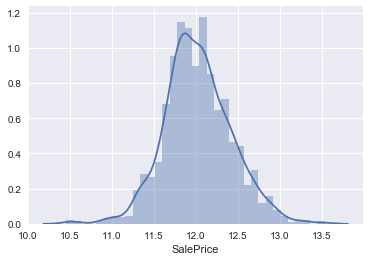

In [7]:
sns.distplot(df_train['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.34550693,
          13.5211395 ,  13.53447303])),
 (0.39826223081618872, 12.024050901109383, 0.99537614756366133))

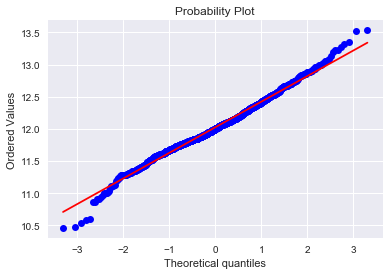

In [8]:
stats.probplot(df_train['SalePrice'], plot=plt)

# EDA
- Merging train and validate
- Impute missing values (Handling missing data)
- Categorical versus Numeric

- df.all.describe(): shows a summary of the numerical attributes

### Merging Train and Validate

In [9]:
#Obs remember to exclude response variable, SalePrice
frames = [df_train, df_test]
df_all = pd.concat(frames)

df_all.shape

(2919, 81)

### Missing values - Overview

In [10]:
#axis=0, summing each row for each column
#isnull = return an boolean depending on missing or not

#Calculat the ratio of missing values
missing = (df_all.isnull().sum(axis=0) / len(df_all)*100).sort_values(ascending=False)

#Dropping all 
missing = missing.drop(missing[missing==0].index)

missing_data = pd.DataFrame({'Missing Ratio' :missing})
missing_data


,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageCond,5.447071
GarageQual,5.447071


### Updated missing value table

In [11]:
#axis=0, summing each row for each column
#isnull = return an boolean depending on missing or not

#Calculat the ratio of missing values
missing1 = (df_all.isnull().sum(axis=0) / len(df_all)*100).sort_values(ascending=False)

#Dropping all 
missing1 = missing1.drop(missing1[missing1==0].index)

missing_data_updated = pd.DataFrame({'Missing Ratio' :missing1})
missing_data_updated

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageCond,5.447071
GarageQual,5.447071


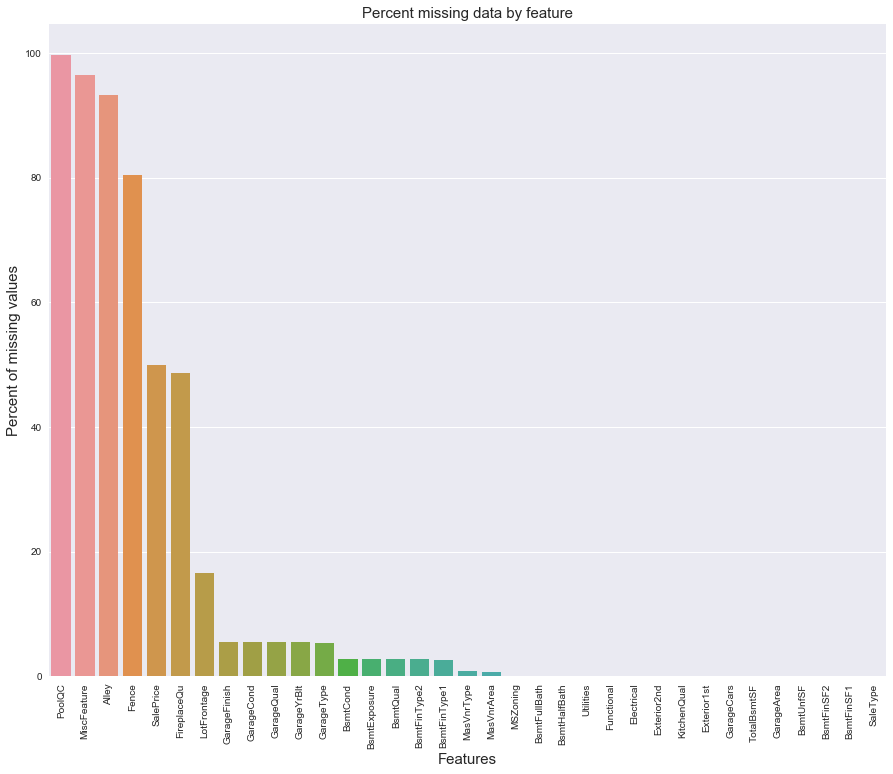

In [12]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing.index, y=missing)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Handling missing values


## PoolQC, MiscFeature, Alley, Fence, FireplaceQu, 3SsnPorch binary
- I perceive these features as being "somewhat" important, and these can indeed help explain the variation in my predictor SalePrice. The risk of converting these four variables into 1 and 0 is that I lose potential infromation in the levels.
- Consider to go back and keep the levels!

In [13]:
#Replace all NA with None
List_ = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df_all[List_] = df_all[List_].fillna('None')

#Function to convert none = 0, and all other categories = 1
def replace(x):
    if x == 'None':
        return 0
    if x != 'None':
        return 1
   
 
df_all['PoolQC'] = df_all['PoolQC'].apply(replace)
df_all['MiscFeature'] = df_all['MiscFeature'].apply(replace)
df_all['Alley'] = df_all['Alley'].apply(replace)
df_all['Fence'] = df_all['Fence'].apply(replace)
df_all['3SsnPorch'] = df_all['3SsnPorch'].apply(replace)


print(df_all['PoolQC'].value_counts())
print(df_all['Alley'].value_counts())
print(df_all['Fence'].value_counts())
print(df_all['MiscFeature'].value_counts())

0    2909
1      10
Name: PoolQC, dtype: int64
0    2721
1     198
Name: Alley, dtype: int64
0    2348
1     571
Name: Fence, dtype: int64
0    2814
1     105
Name: MiscFeature, dtype: int64


### CentralAir

In [14]:
temp = pd.Series(df_all['CentralAir'].replace('Y', 1).replace('[^Y]', 0, regex=True))
df_all['CentralAir'] = temp

In [15]:
df_all['CentralAir'].value_counts()

1    2723
0     196
Name: CentralAir, dtype: int64

## 3SsnPorch, LowQualFinSF 
- Convert into binary. Either the property has a house or it hasn't

In [16]:
List_ = ['3SsnPorch', 'LowQualFinSF']
def replace1(x):
    if x == 0:
        return 0
    if x != 0:
        return 1

df_all['3SsnPorch'] = df_all['3SsnPorch'].apply(replace1)
df_all['LowQualFinSF'] = df_all['LowQualFinSF'].apply(replace1)
print(df_all['3SsnPorch'].value_counts())
print(df_all['LowQualFinSF'].value_counts())

1    2919
Name: 3SsnPorch, dtype: int64
0    2879
1      40
Name: LowQualFinSF, dtype: int64


## FireplaceQC
- Seems like fireplaces with an Excellent Quality tend to have higher median
- Due to that, I want to keep my rank of the variable when converting to numeric

In [17]:
df_all['FireplaceQu'].isnull().sum()

1420

In [18]:
df_all['FireplaceQu'] = df_all['FireplaceQu'].fillna('None')

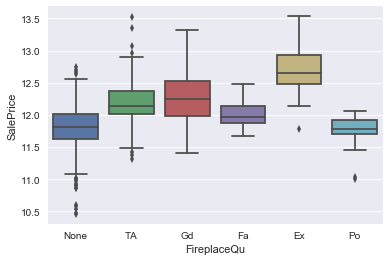

In [19]:
#Thus, I might need to reconsider the way I handle the variable FireplaceQC. It could seems like excellent conditions of fireplaces
#have a higher price.
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = df_all)

### CONVERT FIREPLACEQU SO IT KEEPS THE ORDER (0-5)

In [20]:
ff_dict = {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_all["FireplaceQu"] = df_all["FireplaceQu"].map(ff_dict).astype(int)

### LotFrontage
- LotFrontage is skweded, which means that we need to transform the variable. Here, there is a lot of various options. In this case, I take the median due the fact that we have extremes values. Taking the median makes the distribution less sensitive to these extremes values compared with taking the mean for instance.
- Number of missing values: 486

In [21]:
df_all['LotFrontage'].isnull().sum()

486

#### Imputing missing values - LotFrontage
- Sqrt of area as imputing, we assume that the lot is "close" to be sqaure shaped

In [22]:
df_all.loc[df_all.LotFrontage.isnull(), 'LotFrontage'] = np.sqrt(df_all.loc[df_all.LotFrontage.isnull()].LotArea)
print(df_all['LotFrontage'].isnull().sum())

0


count    2919.000000
mean       75.373489
std        28.948335
min        21.000000
25%        60.000000
50%        72.000000
75%        89.050533
max       405.783193
Name: LotFrontage, dtype: float64


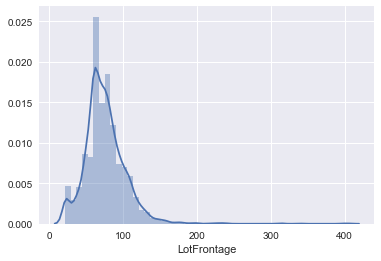

In [23]:
print(df_all['LotFrontage'].describe())
#Histogram
import seaborn as sns
sns.distplot(df_all['LotFrontage'])

### How is LotFrontage Versus SalePrice looking?

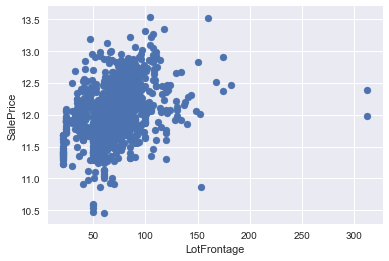

In [24]:
plt.scatter(x = 'LotFrontage', y = 'SalePrice', data = df_train)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

### Garage Quality, Garage Type, Garage Finish, Garage Cond
- Only five procent missing, and I consider to drop since GarageCars and GarageArea probably are better indicators
- Therefore, I replace NA with None

In [25]:
List_Garage = ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']
df_all[List_Garage].isnull().sum()

GarageType      157
GarageFinish    159
GarageCond      159
GarageQual      159
dtype: int64

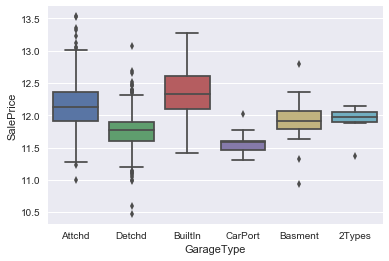

In [26]:
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df_all)

In [27]:
#Rplace missing values with None for Garage Quality, Garage Type, Garage Finish & Garage Condition
df_all[List_Garage] = df_all[List_Garage].fillna('None')

#confirm that 159 missing values were substitued with None
df_all[List_Garage].isnull().sum()

GarageType      0
GarageFinish    0
GarageCond      0
GarageQual      0
dtype: int64

In [28]:
## dubble checking, what NA was replace with None

In [29]:
df_all['GarageQual'] = df_all['GarageQual'].fillna('None')
#confirm that 159 missing values were substitued with None
df_all['GarageQual'].value_counts()

TA      2604
None     159
Fa       124
Gd        24
Po         5
Ex         3
Name: GarageQual, dtype: int64

### GarageYrBlt, Garage Area, Garage Cars
- Replace missing with 0.
- Seems like it is the same observations that are missing
- GarageQuality and GarageYrBlt, this is probably due to the fact that the variable GarageCars = 0 means no cars in such garage, and therefore GarageYrBlt and GarageQuality is not represented!

In [30]:
List_Garage1 = ['GarageYrBlt', 'GarageArea', 'GarageCars']
df_all[List_Garage1].isnull().sum()

GarageYrBlt    159
GarageArea       1
GarageCars       1
dtype: int64

In [31]:
df_all[List_Garage1] = df_all[List_Garage1].fillna(0)
#confirm that NA was replaced with zero
df_all[List_Garage1].isnull().sum()

GarageYrBlt    0
GarageArea     0
GarageCars     0
dtype: int64

### Creating a new variable GarageMissing, indicating that the property do NOT have a house

In [32]:
temp = pd.Series(df_all['GarageQual'].replace('None', 1).replace('[^None]', 0, regex=True))
df_all['GarageMissing'] = temp

### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath
- All numeric values 
- Missing values means no basement
- replace with zero

In [33]:
List_Bsmt_numeric = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
df_all[List_Bsmt_numeric].isnull().sum()
#Observe that we only have few missing values

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [34]:
#Replace NA with zero
df_all[List_Bsmt_numeric] = df_all[List_Bsmt_numeric].fillna(0)
#confirm
df_all[List_Bsmt_numeric].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
- Categorical variables
- NA means that there is NO basement
- Therefore replace NA with None

In [35]:
#Number of missing values for each category
List_Bsmt_categorical = ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']
df_all[List_Bsmt_categorical].isnull().sum()

BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
dtype: int64

In [36]:
#Imputing missing values
df_all[List_Bsmt_categorical] = df_all[List_Bsmt_categorical].fillna('None')
#Confrim that NA was replaced
df_all[List_Bsmt_categorical].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

## Creating a new variable BasementMissing, indicating that the property do NOT have an Basement

In [37]:
temp = pd.Series(df_all['BsmtQual'].replace('None', 1).replace('[^None]', 0, regex=True))
df_all['BasementMissing'] = temp

In [38]:
df_all['BasementMissing'].value_counts()

0    2838
1      81
Name: BasementMissing, dtype: int64

### MasVnrArea
- Numeric variable
- 0 indicate no sqaure meters of "murværk". Since MasVnrType Na means that the house has no "murværk"

In [39]:
#Number of missing
df_all['MasVnrArea'].isnull().sum()

23

In [40]:
df_all['MasVnrArea'] = df_all['MasVnrArea'].fillna(0)
#confirm that Na was replaced with 0
df_all['MasVnrArea'].isnull().sum()

0

### MasVnrType
- Categorical variable where NA means no "murværk"

In [41]:
df_all['MasVnrType'].isnull().sum()

24

In [42]:
df_all['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [43]:
df_all['MasVnrType'] = df_all['MasVnrType'].fillna("None") 
#confirm that Na was replaced with 0
df_all['MasVnrType'].isnull().sum()

0

### MSZoning
- Only four missing observations.
- Observe that RL is significantly more represented that the 3 other MSZonings
- mode should be appropriate in this case. Mode replaces missing with the value that is represented most
- Recall that 0 is rowwise, while 1 is column

In [44]:
X = df_all['MSZoning'].value_counts()
(X)/(X).sum() * 100

RL         77.701544
RM         15.780446
FV          4.768439
RH          0.891938
C (all)     0.857633
Name: MSZoning, dtype: float64

In [45]:
print(df_all['MSZoning'].value_counts())
print(df_all['MSZoning'].isnull().sum())

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
4


In [46]:
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])
#Confirm that the replacement occured succesfully.
print(df_all['MSZoning'].value_counts())
print(df_all['MSZoning'].isnull().sum())

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
0


### Functional
- Categorical variable with 8 cateogories
- describtion: : Home functionality (Assume typical unless deductions are warranted)
- Taking the same approach as for MSzoning, type is clearly most represented!
- Mode replacement


In [47]:
print(df_all['Functional'].value_counts())
print(df_all['Functional'].isnull().sum())

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
2


In [48]:
df_all['Functional'] = df_all['Functional'].fillna(df_all['Functional'].mode()[0])
#Confirm that the replacement occured succesfully.
print(df_all['Functional'].value_counts())
print(df_all['Functional'].isnull().sum())

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
0


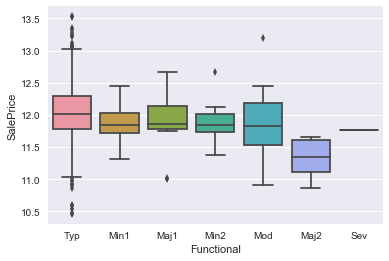

In [49]:
sns.boxplot(x = 'Functional', y = 'SalePrice', data = df_all)

### Utilities
- Categorical varible with four categories
- Type of utilities available
- Only 2 missing values
- Taking the same approach as for MSzoning, type is clearly most represented!
- Mode replacement

In [50]:
print(df_all['Utilities'].value_counts())
print(df_all['Utilities'].isnull().sum())

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
2


In [51]:
df_all['Utilities'] = df_all['Utilities'].fillna(df_all['Utilities'].mode()[0])
#Confirm that the replacement occured succesfully.
print(df_all['Utilities'].value_counts())
print(df_all['Utilities'].isnull().sum())

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
0


### Exterior1st and Exterior2nd
- Exterior1st: Exterior covering on house
- Exteriors2nd: Exterior covering on house (if more than one material)
- Categorical variable with 17 categories
- Exterior1st, only ONE missing value
- Ezterior2nd, only ONE missing value
- Same argument as before, using MODE for replacement!


In [52]:
print(df_all['Exterior1st'].value_counts())
print(df_all['Exterior1st'].isnull().sum())

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64
1


In [53]:
#mode replacement
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])

In [54]:
print(df_all['Exterior2nd'].value_counts())
print(df_all['Exterior2nd'].isnull().sum())

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
0


#### PUTTING THE LAST 5 LEVELS INTO ONE CALLED "OTHER" (reason is to bring down the number of dummy columns we create when do dummy encoding).

In [55]:
df_all.Exterior2nd.replace("Stone", "Other", inplace=True)
df_all.Exterior2nd.replace("AsphShn", "Other", inplace=True)
df_all.Exterior2nd.replace("CBlock", "Other", inplace=True)

### Kitchen Quality
- Categorical with 5 categories
- Only one missing value
- Mode replacement

In [56]:
print(df_all['KitchenQual'].value_counts())
print(df_all['KitchenQual'].isnull().sum())

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64
1


In [57]:
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])

### SaleType
- Categorical with 10 categories
- Only one missing value
- Mode replacement again

In [58]:
print(df_all['SaleType'].value_counts())
print(df_all['SaleType'].isnull().sum())

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64
1


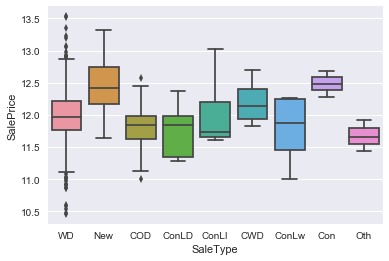

In [59]:
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df_all)

In [60]:
# We consider this as a paramount variable, so we will not aggregate or any other modifications...

In [61]:
# Mode Replacement
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

### Electrical
- Categorical with 5 categories
- Only one missing value
- Mode replacement

In [62]:
print(df_all['Electrical'].value_counts())
print(df_all['Electrical'].isnull().sum())

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
1


In [63]:
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])

## STATUS: NONE of the variables contain MISSING VALUES now

### NEXT:

### Why? Should we convert ordinal variables to numeric. The boxplots below examplies that it might be a good idea.

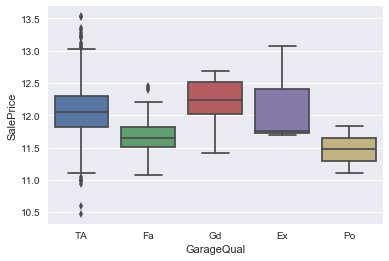

In [64]:
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df_train)

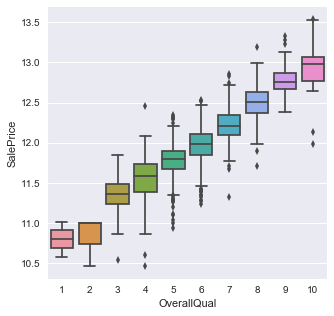

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(5.0, 5.0)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df_train)

#### NEXT: Convert all ORDINAL CATEGORICAL VARIABLES to NUMERIC
#### Scale: 
- None: 0, Po:1, Fa: 2, TA: 3, Gd: 4, Ex: 5
#### Variables:
    - ExterQual
    - ExterCond
    - BsmtCond
    - HeatingQC
    - KitchenQual
    - FirePlaceQu
    - GarageQual
    - GarageCond
    - PoolQC

In [66]:
qual_dict = {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df_all["ExterCond"] = df_all["ExterCond"].map(qual_dict).astype(int)
df_all["ExterQual"] = df_all["ExterQual"].map(qual_dict).astype(int)
df_all["BsmtQual"] = df_all["BsmtQual"].map(qual_dict).astype(int)
df_all["BsmtCond"] = df_all["BsmtCond"].map(qual_dict).astype(int)
df_all["HeatingQC"] = df_all["HeatingQC"].map(qual_dict).astype(int)
df_all["KitchenQual"] = df_all["KitchenQual"].map(qual_dict).astype(int)
df_all["GarageQual"] = df_all["GarageQual"].map(qual_dict).astype(int)
df_all["GarageCond"] = df_all["GarageCond"].map(qual_dict).astype(int)

### GarageFinish

In [67]:
qual_dict_garage = {"None": 0, "Unf": 1, "RFn": 2, "Fin": 3}
df_all["GarageFinish"] = df_all["GarageFinish"].map(qual_dict_garage).astype(int)

### BsmtFinType1, BsmtFinType2
#### Scale:  
- None: 0, Unf: 1, LwQ: 2, Rec: 3, BLQ: 4, ALQ: 5, GLQ: 6
    #### Variables:
    - BsmtFinType1
    - BsmtFinType2
 

In [68]:
bsmt_fin_dict = {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
df_all["BsmtFinType1"] = df_all["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
df_all["BsmtFinType2"] = df_all["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

### BsmtExposure
#### Scale:  
- "None": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4
    #### Variables:
    - BsmtExposure

In [69]:
df_all["BsmtExposure"] = df_all["BsmtExposure"].map({"None": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

### Funcational

In [70]:
df_all["Functional"] = df_all["Functional"].map({None: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

### LabelCountEncoder

In [71]:
class LabelCountEncoder(object):
    def __init__(self):
        self.count_dict = {}
    
    def fit(self, column):
        # This gives you a dictionary with level as the key and counts as the value
        count = column.value_counts().to_dict()
        # We want to rank the key by its value and use the rank as the new value
        self.count_dict = {key[0]: rank+1 for rank, key in enumerate(sorted(count.items(), key=lambda x: x[1]))}
    
    def transform(self, column):
        # If a category only appears in the test set, we will assign the value to zero.
        missing = 0
        return column.apply(lambda x : self.count_dict.get(x, missing))
    
    def fit_transform(self, column):
        self.fit(column)
        return self.transform(column)

In [72]:
list1_ = ['MSZoning', 'Neighborhood', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
       'Exterior1st', 'Exterior2nd', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation',
      'Heating', 'Electrical', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']

for c in df_all[list1_]:
    lce = LabelCountEncoder()
    df_all[c] = lce.fit_transform(df_all[c])

In [73]:
df_all['MSZoning'].value_counts()

5    2269
4     460
3     139
2      26
1      25
Name: MSZoning, dtype: int64

### MSZoning

## Correlation -  Examining Correlation between predictor

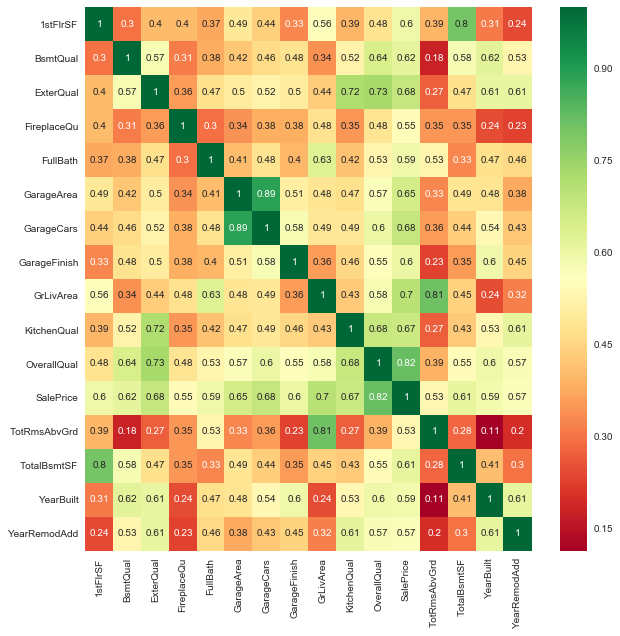

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(10.0, 10.0)
corrmat = df_all.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
g = sns.heatmap(df_all[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## New Features

In [75]:
# 1: Total square feet
df_all['TotLivArea'] = df_all.GrLivArea + df_all.TotalBsmtSF

# 2: # Total number of bathrooms
df_all['TotalBath'] = df_all['BsmtFullBath'] + (0.5 * df_all['BsmtHalfBath']) + df_all['FullBath'] + (0.5 * df_all['HalfBath'])

# 3: BsmtUnFinRatio
df_all['BsmtUnFinRatio'] = df_all.BsmtUnfSF / df_all.TotalBsmtSF 
df_all['BsmtUnFinRatio'] = df_all['BsmtUnFinRatio'].fillna(0)

# 4: AreaPerCar
df_all['AreaPerCar'] = df_all.GarageArea / df_all.GarageCars 
df_all['AreaPerCar'] = df_all['AreaPerCar'].fillna(0)


# 5: AvgRoomSize 
df_all['AvgRoomSize'] = df_all.GrLivArea / df_all.TotRmsAbvGrd

# SHOULD WE KEEP INTERACTION TERMS, I.E. NOT EXLUDE THEM?
# 6: Condition should be reduced

In [76]:
df_all.AreaPerCar.isnull().sum()

0

In [77]:
df_all.GarageCars.value_counts()

2.0    1594
1.0     776
3.0     374
0.0     158
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [78]:
df_all.GarageArea.value_counts()

0.0       158
576.0      97
440.0      96
240.0      69
484.0      68
528.0      65
400.0      58
480.0      54
264.0      51
288.0      50
308.0      48
280.0      30
336.0      29
420.0      29
672.0      23
216.0      23
462.0      23
506.0      21
384.0      21
504.0      21
286.0      20
312.0      19
550.0      17
624.0      17
495.0      17
352.0      17
525.0      17
360.0      16
180.0      16
564.0      16
         ... 
958.0       1
808.0       1
363.0       1
752.0       1
954.0       1
284.0       1
209.0       1
604.0       1
892.0       1
413.0       1
258.0       1
1041.0      1
639.0       1
859.0       1
741.0       1
535.0       1
609.0       1
1184.0      1
853.0       1
1110.0      1
713.0       1
611.0       1
963.0       1
186.0       1
265.0       1
443.0       1
424.0       1
263.0       1
962.0       1
803.0       1
Name: GarageArea, Length: 603, dtype: int64

### TRANSFORMATION OF SKEWED VARIABLE

In [79]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
from scipy.stats import skew, kurtosis
from scipy.special import boxcox1p

numerical_features = ['1stFlrSF',
                      "2ndFlrSF",
                      "GrLivArea",
                      "LotArea",
                      "OpenPorchSF",
                      "WoodDeckSF"]

train_num = df_all[numerical_features]

skewness = train_num.apply(lambda x: skew(x) )
skewness = skewness[abs(skewness) > 0.2]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
print(skewness)

df_all[numerical_features] = np.log(df_all[numerical_features] + 1)

6 skewed numerical features to log transform
1stFlrSF        1.469604
2ndFlrSF        0.861675
GrLivArea       1.269358
LotArea        12.822431
OpenPorchSF     2.535114
WoodDeckSF      1.842433
dtype: float64


In [80]:
df_all[numerical_features].skew()

1stFlrSF       0.064861
2ndFlrSF       0.305206
GrLivArea      0.013194
LotArea       -0.505010
OpenPorchSF   -0.041819
WoodDeckSF     0.158114
dtype: float64

## Outliars!

#### GrLivArea
- Observe a few outliers
- Remove observations with a GrLivArea above 4000

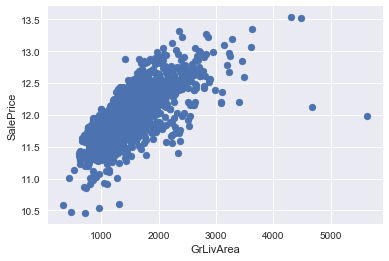

In [81]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df_train)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

#### Dropping GrLivArea > 4000 & SalePrice < 12.5 (TrainingSet)

In [82]:
df_all.loc[(df_all['GrLivArea']>4000) & (df_all['SalePrice']< 12.5)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,YearBuilt,YearRemodAdd,YrSold,GarageMissing,BasementMissing,TotLivArea,TotalBath,BsmtUnFinRatio,AreaPerCar,AvgRoomSize


In [83]:
#df_all1 = df_all.drop(['523', '1298'])
df_all = df_all[df_all.Id != 524]
df_all = df_all[df_all.Id != 1299]
df_all.shape

(2917, 88)

In [84]:
df_train.shape

(1460, 81)

In [85]:
##df_all.drop(df_all[df_all["GrLivArea"] > 4000].index, inplace=True)

##### Confirming that the observations was dropped

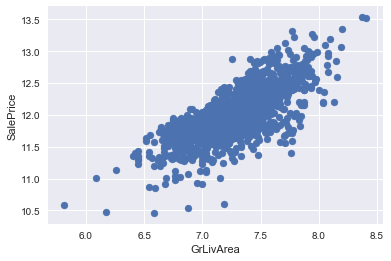

In [86]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df_all)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [87]:
df_all['PavedDrive'].value_counts()

3    2639
2     216
1      62
Name: PavedDrive, dtype: int64

In [88]:
#Get the entire dataframe
pd.set_option('display.max_columns', 80)
df_all

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,...,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,GarageMissing,BasementMissing,TotLivArea,TotalBath,BsmtUnFinRatio,AreaPerCar,AvgRoomSize
0,6.753438,6.751101,1,0,3,5,3,1,706.0,0.0,6,1,1.0,0.0,4,150.0,1,9,8,5,0,3,4,15,13,0,0,0,6,2,8,548.0,2.0,3,2,3,7,2003.0,7.444833,1,...,9.042040,5,65.000000,Reg,0,60,5,196.0,3,0,0,2,24,4.127134,5,7,3,0,0,8,6,6,12.247694,9,0,Pave,8,856.0,AllPub,0.000000,2003,2003,2008,0,0,2566.0,3.5,0.175234,274.000000,213.750000
1,7.141245,0.000000,1,0,3,5,3,4,978.0,0.0,5,1,0.0,1.0,4,284.0,1,8,8,5,0,3,3,14,12,0,3,1,5,2,8,460.0,2.0,3,2,3,7,1976.0,7.141245,0,...,9.169623,2,80.000000,Reg,0,20,5,0.0,4,0,0,5,3,0.000000,8,6,3,0,0,8,6,6,12.109011,9,0,Pave,6,1262.0,AllPub,5.700444,1976,1976,2007,0,0,2524.0,2.5,0.225040,230.000000,210.333333
2,6.825460,6.765039,1,0,3,5,3,2,486.0,0.0,6,1,1.0,0.0,4,434.0,1,9,8,5,0,3,4,15,13,0,3,1,6,2,8,608.0,2.0,3,2,3,7,2001.0,7.488294,1,...,9.328212,5,68.000000,IR1,0,60,5,162.0,3,0,0,9,24,3.761200,5,7,3,0,0,8,6,6,12.317167,9,0,Pave,6,920.0,AllPub,0.000000,2001,2002,2008,0,0,2706.0,3.5,0.471739,304.000000,297.666667
3,6.869014,6.629363,1,0,3,5,4,1,216.0,0.0,5,1,1.0,0.0,3,540.0,1,9,8,5,272,3,3,12,7,0,4,1,4,1,8,642.0,3.0,3,1,3,6,1998.0,7.448916,0,...,9.164401,4,60.000000,IR1,0,70,5,0.0,4,0,0,2,13,3.583519,5,7,3,0,0,8,6,4,11.849398,9,0,Pave,7,756.0,AllPub,0.000000,1915,1970,2006,0,0,2473.0,2.0,0.714286,214.000000,245.285714
4,7.044033,6.960348,1,0,4,5,3,3,655.0,0.0,6,1,1.0,0.0,4,490.0,1,9,8,5,0,3,4,15,13,0,3,1,6,2,8,836.0,3.0,3,2,3,7,2000.0,7.695758,1,...,9.565284,2,84.000000,IR1,0,60,5,350.0,3,0,0,12,10,4.442651,5,8,3,0,0,8,6,6,12.429216,9,0,Pave,9,1145.0,AllPub,5.262690,2000,2000,2008,0,0,3343.0,3.5,0.427948,278.666667,244.222222
5,6.680855,6.340359,1,0,1,5,3,1,732.0,0.0,6,1,1.0,0.0,4,64.0,1,9,8,5,0,3,3,15,13,1,0,0,1,1,8,480.0,2.0,3,1,3,7,1993.0,7.217443,1,...,9.555064,5,85.000000,IR1,0,50,5,0.0,4,1,700,10,15,3.433987,5,5,3,0,0,8,6,6,11.870600,9,0,Pave,5,796.0,AllPub,3.713572,1993,1995,2009,0,0,2158.0,2.5,0.080402,240.000000,272.400000
6,7.435438,0.000000,1,0,3,5,3,3,1369.0,0.0,6,1,1.0,0.0,5,317.0,1,9,8,5,0,3,4,15,13,0,4,1,6,2,8,636.0,2.0,3,2,3,7,2004.0,7.435438,0,...,9.218804,5,75.000000,Reg,0,20,5,186.0,2,0,0,8,21,4.060443,5,8,3,0,0,8,6,6,12.634603,9,0,Pave,7,1686.0,AllPub,5.545177,2004,2005,2007,0,0,3380.0,3.0,0.188019,318.000000,242.000000
7,7.010312,6.891626,1,0,3,5,3,2,859.0,32.0,5,4,1.0,0.0,4,216.0,1,5,8,5,228,3,3,13,11,0,3,2,5,2,8,484.0,2.0,3,2,3,7,1973.0,7.645398,1,...,9.247925,4,101.892100,IR1,0,60,5,240.0,2,1,350,11,17,5.323010,6,7,3,0,0,8,6,6,12.206073,9,0,Pave,7,1107.0,AllPub,5.463832,1973,1973,2009,0,0,3197.0,3.5,0.195122,242.000000,298.571429
8,6.930495,6.624065,1,0,2,5,3,1,0.0,0.0,1,1,0.0,0.0,3,952.0,1,7,8,3,205,3,3,9,7,0,3,2,4,2,7,468.0,2.0,3,1,2,6,1931.0,7.481556,0,...,8.719481,5,51.000000,Reg,0,50,4,0.0,4,0,0,4,23,0.000000,5,7,3,0,0,8,6,4,11.774520,9,0,Pave,8,952.0,AllPub,4.510860,1931,1950,2008,0,0,2726.0,2.0,1.000000,234.000000,221.750000
9,6.982863,0.000000,1,0,2,1,3,1,851.0,0.0,6,1,1.0,0.0,3,140.0,1,7,6,5,0,3,3,14,12,0,3,2,4,1,8,205.0,1.0,3,2,4,7,1939.0,6.982863,0,...,8.912069,4,50.000000,Reg,0,190,5,0.0,4,0,0,1,14,1.609438,6,5,3,0,0,8,6,6,11.678440,9,0,Pave,5,991.0,AllPub,0.000000,1939,1950,2008,0,0,2068.0,2.0,0.141271,205.000000,215.400000


# DROP THE FOLLOWING VARIABLES:
- UTILITIES: Because it's a constant
- POOLAREA

In [92]:
df_all.drop(['Utilities', 'PoolArea']).head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LotArea,LotConfig,LotFrontage,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,GarageMissing,BasementMissing,TotLivArea,TotalBath,BsmtUnFinRatio,AreaPerCar,AvgRoomSize,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Pave,Utilities_NoSeWa
0,6.753438,6.751101,1,0,3,5,3,1,706.0,0.0,6,1,1.0,0.0,4,150.0,1,9,8,5,0,3,4,15,13,0,0,0,6,2,8,548.0,2.0,3,2,3,7,2003.0,7.444833,1,6,5,7,1,1,4,9.042040,5,65.0,0,60,5,196.0,3,0,0,2,24,4.127134,5,7,3,0,0,8,6,6,12.247694,9,0,8,856.0,0.000000,2003,2003,2008,0,0,2566.0,3.5,0.175234,274.000000,213.750000,0,0,1,0,0,0,0,1,1,0
1,7.141245,0.000000,1,0,3,5,3,4,978.0,0.0,5,1,0.0,1.0,4,284.0,1,8,8,5,0,3,3,14,12,0,3,1,5,2,8,460.0,2.0,3,2,3,7,1976.0,7.141245,0,6,5,8,2,1,3,9.169623,2,80.0,0,20,5,0.0,4,0,0,5,3,0.000000,8,6,3,0,0,8,6,6,12.109011,9,0,6,1262.0,5.700444,1976,1976,2007,0,0,2524.0,2.5,0.225040,230.000000,210.333333,0,0,1,0,0,0,0,1,1,0
2,6.825460,6.765039,1,0,3,5,3,2,486.0,0.0,6,1,1.0,0.0,4,434.0,1,9,8,5,0,3,4,15,13,0,3,1,6,2,8,608.0,2.0,3,2,3,7,2001.0,7.488294,1,6,5,7,3,1,4,9.328212,5,68.0,0,60,5,162.0,3,0,0,9,24,3.761200,5,7,3,0,0,8,6,6,12.317167,9,0,6,920.0,0.000000,2001,2002,2008,0,0,2706.0,3.5,0.471739,304.000000,297.666667,0,0,1,0,0,0,0,0,1,0
3,6.869014,6.629363,1,0,3,5,4,1,216.0,0.0,5,1,1.0,0.0,3,540.0,1,9,8,5,272,3,3,12,7,0,4,1,4,1,8,642.0,3.0,3,1,3,6,1998.0,7.448916,0,6,4,7,4,1,4,9.164401,4,60.0,0,70,5,0.0,4,0,0,2,13,3.583519,5,7,3,0,0,8,6,4,11.849398,9,0,7,756.0,0.000000,1915,1970,2006,0,0,2473.0,2.0,0.714286,214.000000,245.285714,0,0,1,0,0,0,0,0,1,0
4,7.044033,6.960348,1,0,4,5,3,3,655.0,0.0,6,1,1.0,0.0,4,490.0,1,9,8,5,0,3,4,15,13,0,3,1,6,2,8,836.0,3.0,3,2,3,7,2000.0,7.695758,1,6,5,7,5,1,4,9.565284,2,84.0,0,60,5,350.0,3,0,0,12,10,4.442651,5,8,3,0,0,8,6,6,12.429216,9,0,9,1145.0,5.262690,2000,2000,2008,0,0,3343.0,3.5,0.427948,278.666667,244.222222,0,0,1,0,0,0,0,0,1,0


### Splitning the dataset back into training and validate

### Dummyfi variables
- IMPORTANT drop the first variable in the dummyfied variable. Dropping the first column avoiding collinearity

In [97]:
df_all = pd.get_dummies(df_all, drop_first=True)

(2917, 93)

In [91]:
pd.set_option('display.max_columns', 500)
dummy_df.shape

NameError: name 'dummy_df' is not defined

#### Spliting the data back into training and validate<

In [ ]:
df_clean_test=dummy_df[dummy_df.SalePrice.isnull()]
df_clean_train=dummy_df[dummy_df.SalePrice.notnull()]

In [ ]:
#Ensure you have 1459 observations
df_clean_test.shape

In [ ]:
#train
df_clean_train.to_csv('cleaned_train_dummy.csv')

In [ ]:
#test
df_clean_test.to_csv('cleaned_test_dummy.csv')

### Without dummifying data

In [ ]:
df_clean_test=df_all[df_all.SalePrice.isnull()]
df_clean_train=df_all[df_all.SalePrice.notnull()]

#### Saving the training and test set and excel.csv

In [ ]:
df_clean_test.to_csv('cleaned_test.csv')
df_clean_train.to_csv('cleaned_train.csv')

In [ ]:
sns.boxplot(df_all.GarageQual, df_all.SalePrice)

In [102]:
df_all['OverallCond'] = df_all.OverallCond.replace({
    1: 1, 2: 1, 3:1 , 4:1, 5:2, 6:3, 7:3, 8:3, 9:3, 10:3})
df_all["OverallGrade"] = df_all["OverallQual"] * df_all["OverallCond"]
df_all['GarageScore'] = df_all.GarageCond * df_all.GarageQual * df_all.GarageArea
df_all['FireScore'] = df_all.Fireplaces * df_all.FireplaceQu
df_all["Overallscore"] = df_all["OverallGrade"]  * df_all['GrLivArea']
df_all["ExterGrade"] = df_all["ExterQual"] * df_all["ExterCond"]
df_all["KitchenScore"] = df_all["KitchenAbvGr"] * df_all["KitchenQual"]
df_all["TotalBath"] = df_all["BsmtFullBath"] + (0.5 * df_all["BsmtHalfBath"]) + \
df_all["FullBath"] + (0.5 * df_all["HalfBath"])
df_all["AllSF"] = df_all["GrLivArea"] + df_all["TotalBsmtSF"]
df_all["AllPorchSF"] = df_all["OpenPorchSF"] + df_all["EnclosedPorch"] + \
df_all["3SsnPorch"] + df_all["ScreenPorch"]

In [99]:
print("Find most important features relative to target")
corr = df_all.corr()
important_var = corr.sort_values(["SalePrice"], ascending = False, inplace = False).SalePrice[1:17]
important_var

In [100]:
mylist =[x for x in important_var.index]

In [101]:
for name in mylist:
    newname2= str(name + '**2')
    newname3= str(name + '**3')
    df_all[newname2] = df_all[name]**2
    df_all[newname3] = df_all[name]**3

Find most important features relative to target


OverallQual     0.821404
TotLivArea      0.820738
GrLivArea       0.737431
ExterQual       0.682225
GarageCars      0.681033
TotalBath       0.676678
KitchenQual     0.669989
GarageArea      0.656128
AllSF           0.647933
TotalBsmtSF     0.647563
GarageScore     0.641157
BsmtQual        0.616897
1stFlrSF        0.615408
Overallscore    0.610329
GarageFinish    0.605602
FullBath        0.595899
Name: SalePrice, dtype: float64

In [112]:
#df_all.columns[df_all.columns.str.contains('\*')]

In [113]:
#plt.scatter(df_all.GarageScore, df_all.SalePrice)

In [114]:
df_all.shape

(2917, 133)

In [115]:
# train and test
df_clean_test = df_all[df_all.SalePrice.isnull()]
df_clean_train =df_all[df_all.SalePrice.notnull()]

In [116]:
X = df_clean_train.drop(['Id', 'SalePrice', 'PavedDrive'], axis = 1)
y = df_clean_train.SalePrice

In [117]:
X.shape

(1458, 130)

In [118]:
from sklearn import linear_model

In [119]:
elastic = linear_model.ElasticNet()

In [120]:
fitted_train = elastic.fit(X, y)

/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [121]:
fitted_train.score(X, y)

0.88480170685660009

In [123]:
#fitted_test = fitted_train.predict(X)

In [131]:
y_hat = elastic.predict(X)
y_hat = np.exp(y_hat)
y_hat

array([ 204654.11820693,  181858.73900449,  207486.07523784, ...,
        220718.97138728,  133274.55205744,  153007.70164863])

In [132]:
print('MSE on training data: ', np.mean((np.exp(y) - y_hat)**2))

MSE on training data:  629310477.808818


In [133]:
np.mean((np.exp(y) - y_hat)**2)

629310477.808818

In [136]:
np.sqrt(629310477)

25086.061408678725

In [134]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [135]:
rmse(np.exp(y), y_hat)

25086.061424799569

In [ ]:
df_test = df_clean_test.drop(['Id', "PavedDrive"], axis = 1)

In [ ]:
Id = df_clean_test['Id']

In [151]:

#mylist2 = mylist.append('SalePrice')
mylist[:17]

['OverallQual',
 'TotLivArea',
 'GrLivArea',
 'ExterQual',
 'GarageCars',
 'TotalBath',
 'KitchenQual',
 'GarageArea',
 'AllSF',
 'TotalBsmtSF',
 'GarageScore',
 'BsmtQual',
 '1stFlrSF',
 'Overallscore',
 'GarageFinish',
 'FullBath',
 'SalePrice']

In [152]:
df_reduced = df_all[mylist[:17]]

In [153]:
# train and test
df_red_test = df_reduced[df_reduced.SalePrice.isnull()]
df_red_train =df_reduced[df_reduced.SalePrice.notnull()]

In [155]:
X = df_red_train.drop(['SalePrice'], axis = 1)
y = df_red_train.SalePrice

In [156]:
reduced_fitted = elastic.fit(X, y)

In [159]:
fitted_train.score(X, y)

0.78674143427118137